#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# upload file


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


# Load the Dataset

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EXPLORATORY DATA ANALYSIS

<Axes: xlabel='count', ylabel='Gender'>

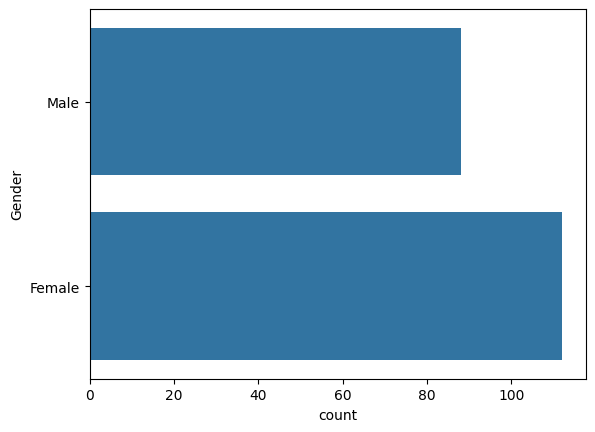

In [ ]:
sns.countplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

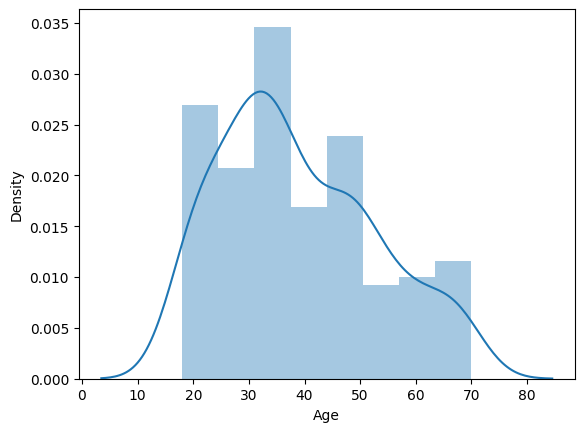

In [ ]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

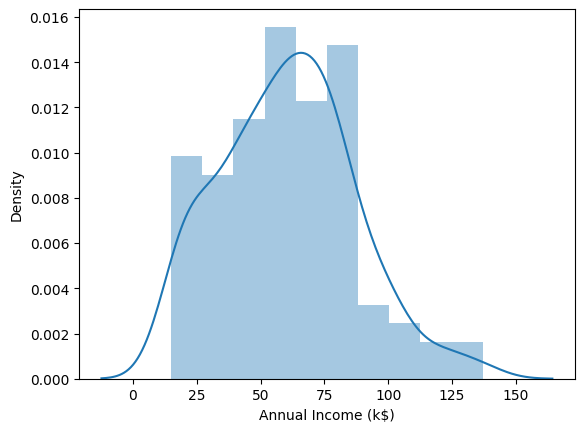

In [ ]:
sns.distplot(df['Annual Income (k$)'])

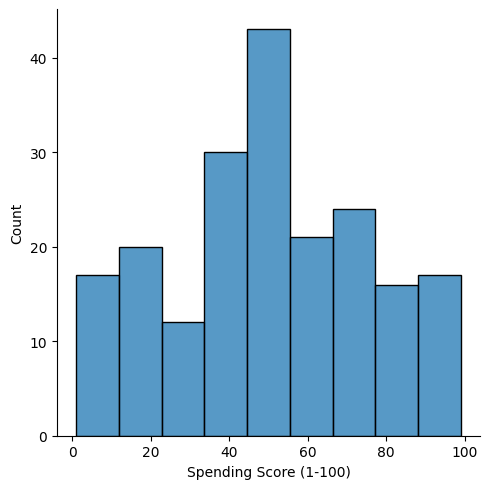

In [ ]:
sns.displot(df['Spending Score (1-100)'])

## CLUSTERING

In [ ]:
df1=df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

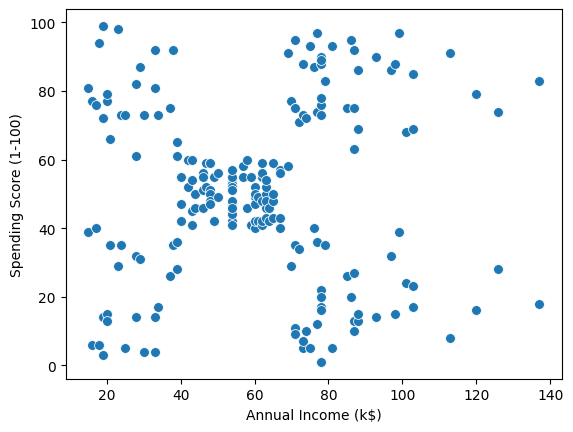

In [ ]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,s=50)

In [ ]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(df1)
  errors.append(kmeans.inertia_)

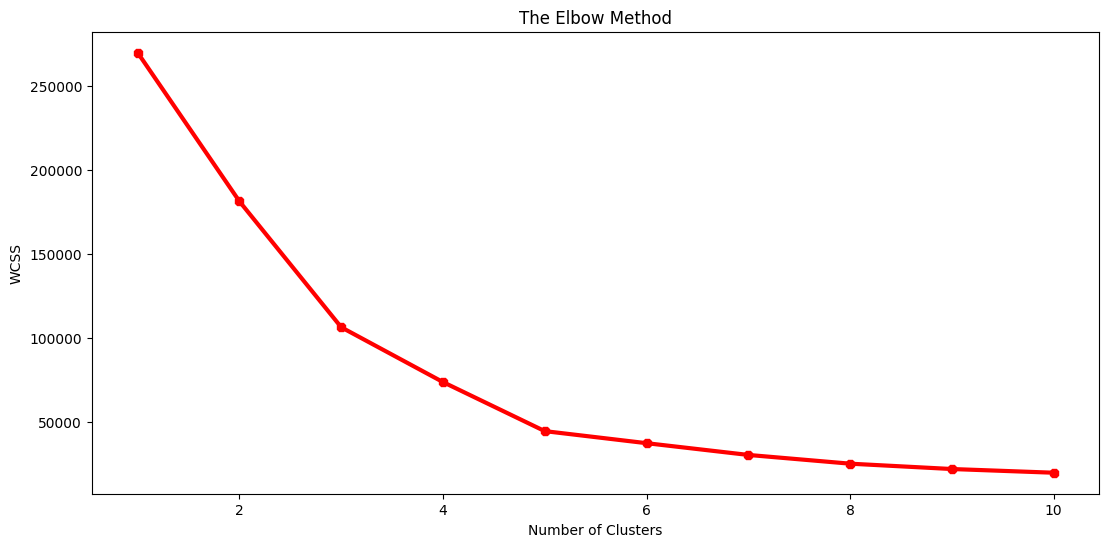

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
Km=KMeans(n_clusters=5)
Km.fit(df1)
y=Km.predict(df1)
df1['label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

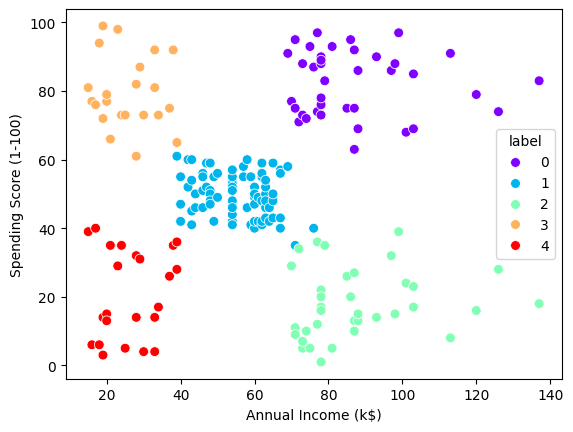

In [ ]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,hue='label',s=50,palette='rainbow')

In [ ]:
df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [ ]:
errors = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df1)
  errors.append(kmeans.inertia_)

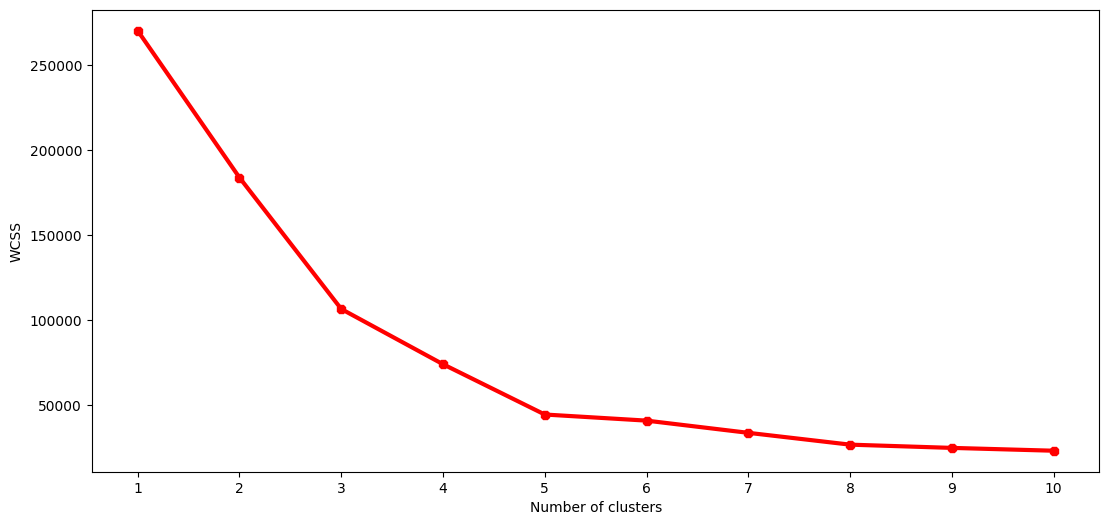

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors, linewidth=3,color='red',marker='8')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11,1))
plt.show()

In [ ]:
km=KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['label']=y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,4
1,15,81,21,2
2,16,6,20,4
3,16,77,23,2
4,17,40,31,4


Text(0.5, 0, 'Spending')

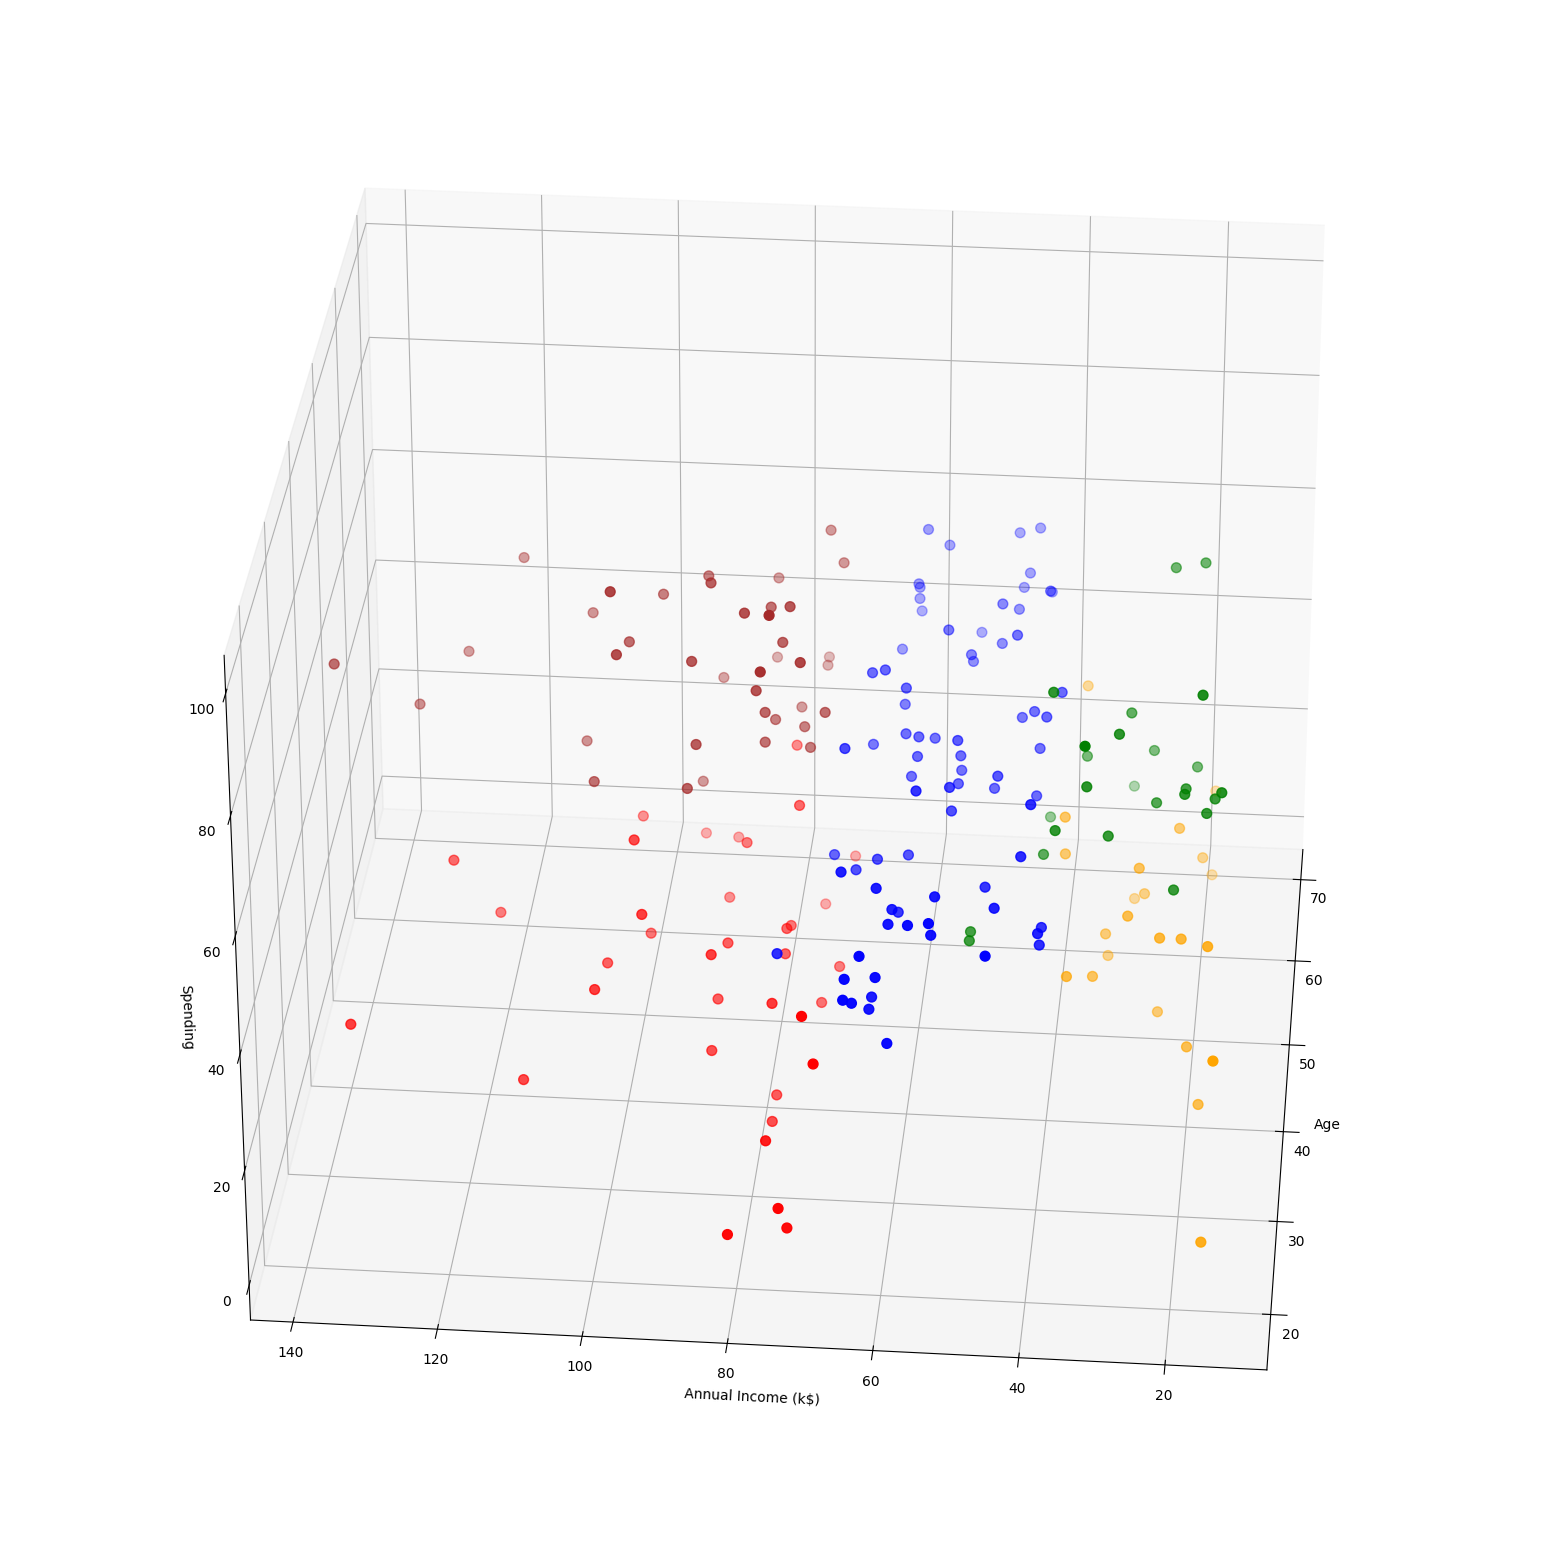

In [ ]:
fig=plt.figure(figsize=(30,20))
ax=plt.axes(projection='3d')

ax.scatter(df2['Age'][df2['label']==0],df2['Annual Income (k$)'][df2['label']==0],df2['Spending Score (1-100)'][df2['label']==0],c='blue',s=50)
ax.scatter(df2['Age'][df2['label']==1],df2['Annual Income (k$)'][df2['label']==1],df2['Spending Score (1-100)'][df2['label']==1],c='red',s=50)
ax.scatter(df2['Age'][df2['label']==2],df2['Annual Income (k$)'][df2['label']==2],df2['Spending Score (1-100)'][df2['label']==2],c='green',s=50)
ax.scatter(df2['Age'][df2['label']==3],df2['Annual Income (k$)'][df2['label']==3],df2['Spending Score (1-100)'][df2['label']==3],c='brown',s=50)
ax.scatter(df2['Age'][df2['label']==4],df2['Annual Income (k$)'][df2['label']==4],df2['Spending Score (1-100)'][df2['label']==4],c='orange',s=50)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending')